Analisi diffusione COVID-19 nel mondo Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data;
 alla voce "🗂 dataset" scaricare il dataset nel formato che si preferisce. 
 • Si richiede di verificare le dimensioni del dataset e i relativi metadati; Download our complete COVID-19 
 • Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente; 
 • Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente); 
 • Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali; 
 • Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo; 
 • Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
import datetime 

In [19]:
df=pd.read_csv("C:/Users/Alessio Mangiagi/Desktop/python_conn/beginner_datasets/owid-covid-data (1).csv")

In [20]:
df.sample(10)
df

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
401076      ZWE    Africa     Zimbabwe  2024-05-08     266362.0        0.0   
401077      ZWE    Africa     Zimbabwe  2024-05-09     266362.0        0.0   
401078      ZWE    Africa     Zimbabwe  2024-05-10     266362.0        0.0   
401079      ZWE    Africa     Zimbabwe  2024-05-11     266362.0        0.0   
401080      ZWE    Africa     Zimbabwe  2024-05-12     266362.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
401076                 0.0        5740.0         0.0                  0.0   
401077                 0.0        5740.0         0.0                  0.0   
401078                 0.0        5740.0         0.0                  0.0   
401079                 0.0        5740.0         0.0                  0.0   
401080                 0.0        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
401076  ...          30.7                  36.791                         1.7   
401077  ...          30.7                  36.791                         1.7   
401078  ...          30.7                  36.791                         1.7   
401079  ...          30.7                  36.791                         1.7   
401080  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
401076            61.49                    0.571  16320539.0   
401077            61.49                    0.571  16320539.0   
401078            61.49                    0.571  16320539.0   
401079            61.49                    0.571  16320539.0   
401080            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

Inizio metadati

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401081 entries, 0 to 401080
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    401081 non-null  object 
 1   continent                                   381867 non-null  object 
 2   location                                    401081 non-null  object 
 3   date                                        401081 non-null  object 
 4   total_cases                                 362004 non-null  float64
 5   new_cases                                   389832 non-null  float64
 6   new_cases_smoothed                          388602 non-null  float64
 7   total_deaths                                339451 non-null  float64
 8   new_deaths                                  390196 non-null  float64
 9   new_deaths_smoothed                         388966 non-null  float64
 

In [22]:
df["continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [23]:
df["date"]=pd.to_datetime(df["date"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401081 entries, 0 to 401080
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    401081 non-null  object        
 1   continent                                   381867 non-null  object        
 2   location                                    401081 non-null  object        
 3   date                                        401081 non-null  datetime64[ns]
 4   total_cases                                 362004 non-null  float64       
 5   new_cases                                   389832 non-null  float64       
 6   new_cases_smoothed                          388602 non-null  float64       
 7   total_deaths                                339451 non-null  float64       
 8   new_deaths                                  390196 non-null  float64      

Fine metadati


In [25]:
casi_continenti=df.groupby("continent")["total_cases"].sum()
casi_continenti

continent
Africa           1.351276e+10
Asia             2.268447e+11
Europe           2.155291e+11
North America    1.166456e+11
Oceania          1.034003e+10
South America    6.771490e+10
Name: total_cases, dtype: float64

<Axes: xlabel='continent'>

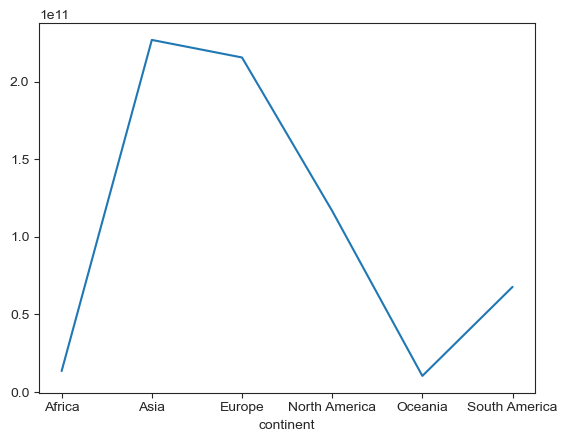

In [26]:
casi_continenti.plot()

Funzione comparativa dati .
 • Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [27]:
#NOTA BENE gli unici valori disponibili sono :'Asia' ,'Europe', 'Africa', 'Oceania', 'North America','South America'.

def Valori_continenti():
    a = str(input("primo continente: "))
    b = str(input("secondo continente: "))

    continente1 = df[df["continent"] == a]["total_cases"]
    continente2 = df[df["continent"] == b]["total_cases"]
    massimo_continente1 = continente1.min()
    massimo_continente2 = continente2.min()
    massimo_continente1 = continente1.max()
    massimo_continente2 = continente2.max()
    media_continente1 = continente1.mean()
    media_continente2 = continente2.mean()
    totale_casi_mondo = df["total_cases"].sum()
    percentuale_continente1 = (continente1.sum() / totale_casi_mondo) * 100
    percentuale_continente2 = (continente2.sum() / totale_casi_mondo) * 100

    print(f'Dati per {a}:')
    print(f'V. massimo: {massimo_continente1}')
    print(f'Media: {media_continente1}')
    print(f'Percentuale rispetto ai casi totali: {percentuale_continente1:.2f}%\n')
    print(f'Dati per {b}:')
    print(f'V. massimo: {massimo_continente2}')
    print(f'Media: {media_continente2}')
    print(f'Percentuale rispetto ai casi totali: {percentuale_continente2:.2f}%')

Valori_continenti()

Dati per a:
V. massimo: nan
Media: nan
Percentuale rispetto ai casi totali: 0.00%

Dati per s:
V. massimo: nan
Media: nan
Percentuale rispetto ai casi totali: 0.00%


Dati Italia 2022
• Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

In [42]:
df['somma_cumulativa'] = df.groupby('date')['total_cases'].cumsum()
df

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan 2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan 2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan 2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan 2020-01-09          NaN        0.0   
...         ...       ...          ...        ...          ...        ...   
401076      ZWE    Africa     Zimbabwe 2024-05-08     266362.0        0.0   
401077      ZWE    Africa     Zimbabwe 2024-05-09     266362.0        0.0   
401078      ZWE    Africa     Zimbabwe 2024-05-10     266362.0        0.0   
401079      ZWE    Africa     Zimbabwe 2024-05-11     266362.0        0.0   
401080      ZWE    Africa     Zimbabwe 2024-05-12     266362.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
401076                 0.0        5740.0         0.0                  0.0   
401077                 0.0        5740.0         0.0                  0.0   
401078                 0.0        5740.0         0.0                  0.0   
401079                 0.0        5740.0         0.0                  0.0   
401080                 0.0        5740.0         0.0                  0.0   

        ...  handwashing_facilities  hospital_beds_per_thousand  \
0       ...                  37.746                         0.5   
1       ...                  37.746                         0.5   
2       ...                  37.746                         0.5   
3       ...                  37.746                         0.5   
4       ...                  37.746                         0.5   
...     ...                     ...                         ...   
401076  ...                  36.791                         1.7   
401077  ...                  36.791                         1.7   
401078  ...                  36.791                         1.7   
401079  ...                  36.791                         1.7   
401080  ...                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
401076            61.49                    0.571  16320539.0   
401077            61.49                    0.571  16320539.0   
401078            61.49                    0.571  16320539.0   
401079            61.49                    0.571  16320539.0   
401080            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                                        NaN                          NaN   
...                                      ...                          ...   
401076                                   NaN

In [44]:
Italia=df.loc[(df["location"]=="Italy")]
Italia

iso_code continent location       date  total_cases  new_cases  \
171640      ITA    Europe    Italy 2020-01-05          NaN        0.0   
171641      ITA    Europe    Italy 2020-01-06          NaN        0.0   
171642      ITA    Europe    Italy 2020-01-07          NaN        0.0   
171643      ITA    Europe    Italy 2020-01-08          NaN        0.0   
171644      ITA    Europe    Italy 2020-01-09          NaN        0.0   
...         ...       ...      ...        ...          ...        ...   
173235      ITA    Europe    Italy 2024-05-18          NaN        NaN   
173236      ITA    Europe    Italy 2024-05-19          NaN        NaN   
173237      ITA    Europe    Italy 2024-05-20          NaN        NaN   
173238      ITA    Europe    Italy 2024-05-21          NaN        NaN   
173239      ITA    Europe    Italy 2024-05-22          NaN        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
171640                 NaN           NaN         0.0                  NaN   
171641                 NaN           NaN         0.0                  NaN   
171642                 NaN           NaN         0.0                  NaN   
171643                 NaN           NaN         0.0                  NaN   
171644                 NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
173235                 NaN           NaN         NaN                  NaN   
173236                 NaN           NaN         NaN                  NaN   
173237                 NaN           NaN         NaN                  NaN   
173238                 NaN           NaN         NaN                  NaN   
173239                 NaN           NaN         NaN                  NaN   

        ...  handwashing_facilities  hospital_beds_per_thousand  \
171640  ...                     NaN                        3.18   
171641  ...                     NaN                        3.18   
171642  ...                     NaN                        3.18   
171643  ...                     NaN                        3.18   
171644  ...                     NaN                        3.18   
...     ...                     ...                         ...   
173235  ...                     NaN                        3.18   
173236  ...                     NaN                        3.18   
173237  ...                     NaN                        3.18   
173238  ...                     NaN                        3.18   
173239  ...                     NaN                        3.18   

        life_expectancy  human_development_index  population  \
171640            83.51                    0.892  59037472.0   
171641            83.51                    0.892  59037472.0   
171642            83.51                    0.892  59037472.0   
171643            83.51                    0.892  59037472.0   
171644            83.51                    0.892  59037472.0   
...                 ...                      ...         ...   
173235            83.51                    0.892  59037472.0   
173236            83.51                    0.892  59037472.0   
173237            83.51                    0.892  59037472.0   
173238            83.51                    0.892  59037472.0   
173239            83.51                    0.892  59037472.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
171640                               -1904.1                       -12.37   
171641                                   NaN                          NaN   
171642                                   NaN                          NaN   
171643                                   NaN                          NaN   
171644                                   NaN                          NaN   
...                                      ...                          ...   
173235                                   NaN                          NaN   
173236         

In [45]:
Italia_2022=Italia[(Italia["date"] >= "2022-01-01") & (Italia["date"] <= "2022-12-31")]
Italia_2022

iso_code continent location       date  total_cases  new_cases  \
172367      ITA    Europe    Italy 2022-01-01    5622431.0        0.0   
172368      ITA    Europe    Italy 2022-01-02    6267035.0   644604.0   
172369      ITA    Europe    Italy 2022-01-03    6267035.0        0.0   
172370      ITA    Europe    Italy 2022-01-04    6267035.0        0.0   
172371      ITA    Europe    Italy 2022-01-05    6267035.0        0.0   
...         ...       ...      ...        ...          ...        ...   
172727      ITA    Europe    Italy 2022-12-27   25060503.0        0.0   
172728      ITA    Europe    Italy 2022-12-28   25060503.0        0.0   
172729      ITA    Europe    Italy 2022-12-29   25060503.0        0.0   
172730      ITA    Europe    Italy 2022-12-30   25060503.0        0.0   
172731      ITA    Europe    Italy 2022-12-31   25060503.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
172367           36797.000      136530.0         0.0              140.857   
172368           92086.286      137513.0       983.0              140.429   
172369           92086.286      137513.0         0.0              140.429   
172370           92086.286      137513.0         0.0              140.429   
172371           92086.286      137513.0         0.0              140.429   
...                    ...           ...         ...                  ...   
172727           18918.143      184168.0         0.0              114.000   
172728           18918.143      184168.0         0.0              114.000   
172729           18918.143      184168.0         0.0              114.000   
172730           18918.143      184168.0         0.0              114.000   
172731           18918.143      184168.0         0.0              114.000   

        ...  handwashing_facilities  hospital_beds_per_thousand  \
172367  ...                     NaN                        3.18   
172368  ...                     NaN                        3.18   
172369  ...                     NaN                        3.18   
172370  ...                     NaN                        3.18   
172371  ...                     NaN                        3.18   
...     ...                     ...                         ...   
172727  ...                     NaN                        3.18   
172728  ...                     NaN                        3.18   
172729  ...                     NaN                        3.18   
172730  ...                     NaN                        3.18   
172731  ...                     NaN                        3.18   

        life_expectancy  human_development_index  population  \
172367            83.51                    0.892  59037472.0   
172368            83.51                    0.892  59037472.0   
172369            83.51                    0.892  59037472.0   
172370            83.51                    0.892  59037472.0   
172371            83.51                    0.892  59037472.0   
...                 ...                      ...         ...   
172727            83.51                    0.892  59037472.0   
172728            83.51                    0.892  59037472.0   
172729            83.51                    0.892  59037472.0   
172730            83.51                    0.892  59037472.0   
172731            83.51                    0.892  59037472.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
172367                                   NaN                          NaN   
172368                              168226.3                        12.99   
172369                                   NaN                          NaN   
172370                                   NaN                          NaN   
172371                                   NaN                          NaN   
...                                      ...                          ...   
172727                                   NaN                          NaN   
172728         

c:\Users\Alessio Mangiagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alessio Mangiagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


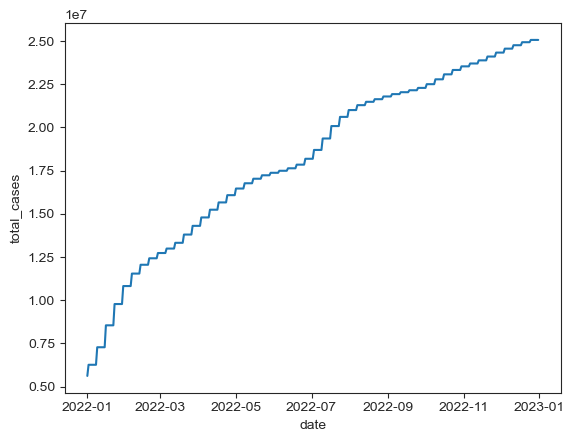

In [46]:
#grafico somma per casi totali
sns.lineplot(Italia_2022, x="date", y="total_cases")
sns.set_style("ticks")

In [32]:

import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Alessio Mangiagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alessio Mangiagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


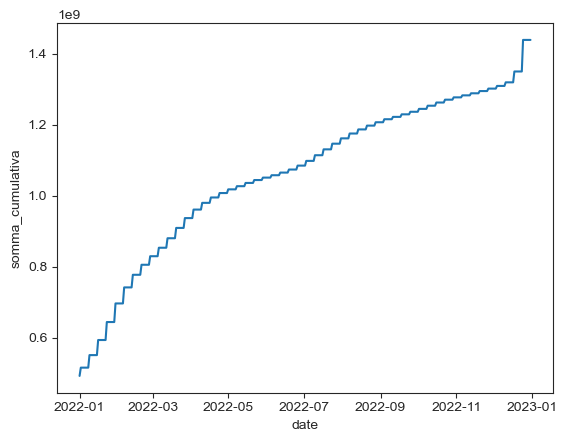

In [47]:
#Grafico somma cumulativa
sns.lineplot(Italia_2022, x="date", y="somma_cumulativa")
sns.set_style("ticks")

c:\Users\Alessio Mangiagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alessio Mangiagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


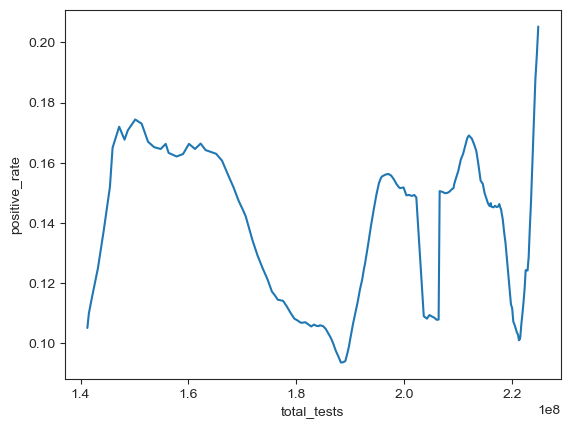

In [ ]:
#Grafico test COVID-19
sns.lineplot(Italia_2022, x="total_tests", y="positive_rate")
sns.set_style("ticks")

Possiamo notare una quasi totale sovrapponibilita dei grafici , indice di una crescente fase infettiva (e di un aumento costante nell'uso di tamponi da parte degli organi di vigilanza).

 Comparativa Italia, Germania e Francia
 • Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo; 
 • Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [48]:
IGF = df[(df["location"].isin(["Italy", "Germany", "France"])) & (df["date"] >= "2022-05-01") & (df["date"] <= "2023-04-30")]
IGF.sample(15)

iso_code continent location       date  total_cases  new_cases  \
172700      ITA    Europe    Italy 2022-11-30   24327664.0        0.0   
172744      ITA    Europe    Italy 2023-01-13   25301143.0        0.0   
121932      FRA    Europe   France 2023-04-13   38701054.0        0.0   
121623      FRA    Europe   France 2022-06-08   28647902.0        0.0   
131183      DEU    Europe  Germany 2022-06-28   27877640.0        0.0   
131427      DEU    Europe  Germany 2023-02-27   38131195.0        0.0   
172675      ITA    Europe    Italy 2022-11-05   23531023.0        0.0   
121610      FRA    Europe   France 2022-05-26   28386474.0        0.0   
121624      FRA    Europe   France 2022-06-09   28647902.0        0.0   
172702      ITA    Europe    Italy 2022-12-02   24327664.0        0.0   
121734      FRA    Europe   France 2022-09-27   34005579.0        0.0   
121648      FRA    Europe   France 2022-07-03   30327933.0   731586.0   
121726      FRA    Europe   France 2022-09-19   33774847.0        0.0   
172669      ITA    Europe    Italy 2022-10-30   23531023.0   208501.0   
172518      ITA    Europe    Italy 2022-06-01   17373741.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
172700           32636.857      181271.0         0.0               84.571   
172744           15473.143      185532.0         0.0               87.714   
121932            7906.286      166267.0         0.0               26.857   
121623           21153.286      149202.0         0.0               47.000   
131183           82032.143      144384.0         0.0               80.857   
131427           16204.857      170722.0         0.0               85.571   
172675           29785.857      179101.0         0.0               79.857   
121610           23177.000      148573.0         0.0               66.571   
121624           21153.286      149202.0         0.0               47.000   
172702           32636.857      181271.0         0.0               84.571   
121734           32961.714      155357.0         0.0               31.000   
121648          104512.286      150259.0       264.0               37.714   
121726           26979.000      155140.0         0.0               28.857   
172669           29785.857      179101.0       559.0               79.857   
172518           20639.714      166542.0         0.0               89.143   

        ...  handwashing_facilities  hospital_beds_per_thousand  \
172700  ...                     NaN                        3.18   
172744  ...                     NaN                        3.18   
121932  ...                     NaN                        5.98   
121623  ...                     NaN                        5.98   
131183  ...                     NaN                        8.00   
131427  ...                     NaN                        8.00   
172675  ...                     NaN                        3.18   
121610  ...                     NaN                        5.98   
121624  ...                     NaN                        5.98   
172702  ...                     NaN                        3.18   
121734  ...                     NaN                        5.98   
121648  ...                     NaN                        5.98   
121726  ...                     NaN                        5.98   
172669  ...                     NaN                        3.18   
172518  ...                     NaN                        3.18   

        life_expectancy  human_development_index  population  \
172700            83.51                    0.892  59037472.0   
172744            83.51                    0.892  59037472.0   
121932            82.66                    0.901  67813000.0   
121623            82.66                    0.901  67813000.0   
131183            81.33                    0.947  83369840.0   
131427            81.33                    0.947  83369840.0   
172675            83.51                    0.892  59037472.0   
121610            82

Text(0, 0.5, 'Ospedalizati ICU')

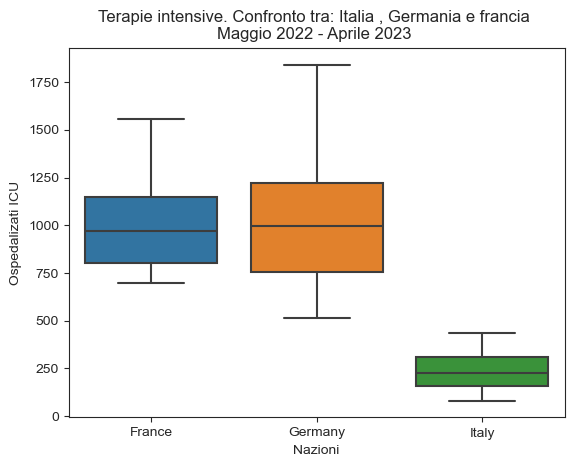

In [49]:
sns.boxplot(data=IGF, x='location', y='icu_patients')
plt.title("Terapie intensive. Confronto tra: Italia , Germania e francia \nMaggio 2022 - Aprile 2023 ")
plt.xlabel("Nazioni")
plt.ylabel("Ospedalizati ICU")

Possiamo notare una enorme differenza tra gli ospedalizati nei  paesi presi in esame, questo probabilmente è dovuto ad un diverso assetto del sistema sanitario nazionale.

In [50]:
IGFS = df[(df["location"].isin(["Italy", "Germany", "France","Spain"])) & (df["date"] >= "2023-01-01") & (df["date"] <= "2023-12-31")]
IGFS.sample(15)

iso_code continent location       date  total_cases  new_cases  \
121875      FRA    Europe   France 2023-02-15   38375971.0        0.0   
339382      ESP    Europe    Spain 2023-07-31   13980340.0        NaN   
173029      ITA    Europe    Italy 2023-10-25   26214552.0        0.0   
131590      DEU    Europe  Germany 2023-08-09   38437756.0        NaN   
131474      DEU    Europe  Germany 2023-04-15   38371551.0        0.0   
122181      FRA    Europe   France 2023-12-18   38997490.0        NaN   
172985      ITA    Europe    Italy 2023-09-11   25988747.0        0.0   
131623      DEU    Europe  Germany 2023-09-11   38437756.0        NaN   
131658      DEU    Europe  Germany 2023-10-16   38437756.0        NaN   
131599      DEU    Europe  Germany 2023-08-18   38437756.0        NaN   
339449      ESP    Europe    Spain 2023-10-06   13980340.0        NaN   
339219      ESP    Europe    Spain 2023-02-18   13819448.0        0.0   
122169      FRA    Europe   France 2023-12-06   38997490.0        NaN   
131669      DEU    Europe  Germany 2023-10-27   38437756.0        NaN   
339172      ESP    Europe    Spain 2023-01-02   13769785.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
121875            3220.714      164911.0         0.0               24.429   
339382                 NaN      121852.0         NaN                  NaN   
173029            4276.143      192312.0         0.0               30.571   
131590                 NaN      174979.0         NaN                  NaN   
131474            2097.000      173709.0         0.0               39.714   
122181                 NaN      168029.0         NaN                  NaN   
172985            3532.857      191407.0         0.0               12.714   
131623                 NaN      174979.0         NaN                  NaN   
131658                 NaN      174979.0         NaN                  NaN   
131599                 NaN      174979.0         NaN                  NaN   
339449                 NaN      121852.0         NaN                  NaN   
339219             867.714      120085.0         0.0               14.714   
122169                 NaN      168017.0         NaN                  NaN   
131669                 NaN      174979.0         NaN                  NaN   
339172            2117.571      119153.0         0.0               30.000   

        ...  handwashing_facilities  hospital_beds_per_thousand  \
121875  ...                     NaN                        5.98   
339382  ...                     NaN                        2.97   
173029  ...                     NaN                        3.18   
131590  ...                     NaN                        8.00   
131474  ...                     NaN                        8.00   
122181  ...                     NaN                        5.98   
172985  ...                     NaN                        3.18   
131623  ...                     NaN                        8.00   
131658  ...                     NaN                        8.00   
131599  ...                     NaN                        8.00   
339449  ...                     NaN                        2.97   
339219  ...                     NaN                        2.97   
122169  ...                     NaN                        5.98   
131669  ...                     NaN                        8.00   
339172  ...                     NaN                        2.97   

        life_expectancy  human_development_index  population  \
121875            82.66                    0.901  67813000.0   
339382            83.56                    0.904  47558632.0   
173029            83.51                    0.892  59037472.0   
131590            81.33                    0.947  83369840.0   
131474            81.33                    0.947  83369840.0   
122181            82.66                    0.901  67813000.0   
172985            83.51                    0.892  59037472.0   
131623            81

In [51]:
IGFS.groupby("location")["hosp_patients"].sum()

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

In [52]:
Germania_2023 = IGFS.loc[IGFS["location"] == "Germany"]
Germania_2023["hosp_patients"].nunique

<bound method IndexOpsMixin.nunique of 131370   NaN
131371   NaN
131372   NaN
131373   NaN
131374   NaN
          ..
131730   NaN
131731   NaN
131732   NaN
131733   NaN
131734   NaN
Name: hosp_patients, Length: 365, dtype: float64>

La rimozione dei nulli in questo caso si rivelerebbein una perdita drammatica di dati .
Pertanto consiglio l'implemetazione di un data frame apposio per la sostituzione dei nulli.